In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("/Users/nicolerodriguez/Downloads/Automated_Traffic_Volume_Counts.csv")

print(df.info)
print(df.shape)
df.head()

<bound method DataFrame.info of           RequestID           Boro    Yr   M   D  HH  MM  Vol  SegmentID  \
0             20856         Queens  2015   6  23  23  30    9     171896   
1             21231  Staten Island  2015   9  14   4  15    6       9896   
2             29279          Bronx  2017  10  19   4  30   85      77817   
3             27019       Brooklyn  2017  11   7  18  30  168     188023   
4             26734      Manhattan  2017  11   3  22   0  355     137516   
...             ...            ...   ...  ..  ..  ..  ..  ...        ...   
27190506      28843         Queens  2019   1  11   3  30   13      48625   
27190507      21109       Brooklyn  2015   9  28  18  45   65      45144   
27190508      23455         Queens  2016   5  23  13  30   55     149068   
27190509      22517          Bronx  2016   3  19   9   0   82      89528   
27190510      10450         Queens  2012  10  19   0  30   20      69002   

                                                WktGeom

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction
0,20856,Queens,2015,6,23,23,30,9,171896,POINT (1052296.600156678 199785.26932711253),94 AVENUE,207 Street,Francis Lewis Boulevard,WB
1,21231,Staten Island,2015,9,14,4,15,6,9896,POINT (942668.0589509147 171441.21296926),RICHMOND TERRACE,Wright Avenue,Emeric Court,WB
2,29279,Bronx,2017,10,19,4,30,85,77817,POINT (1016508.0034050211 235221.59092266942),HUNTS POINT AVENUE,Whittier Street,Randall Avenue,NB
3,27019,Brooklyn,2017,11,7,18,30,168,188023,POINT (992925.4316054962 184116.82855457635),FLATBUSH AVENUE,Brighton Line,Brighton Line,NB
4,26734,Manhattan,2017,11,3,22,0,355,137516,POINT (1004175.9505178436 247779.63624949602),WASHINGTON BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB


In [5]:
df.isnull().sum()


RequestID       0
Boro            0
Yr              0
M               0
D               0
HH              0
MM              0
Vol             0
SegmentID       0
WktGeom         0
street          0
fromSt          0
toSt         2002
Direction       0
dtype: int64

In [6]:
df.dropna(inplace=True)


In [7]:
df.isnull().sum()


RequestID    0
Boro         0
Yr           0
M            0
D            0
HH           0
MM           0
Vol          0
SegmentID    0
WktGeom      0
street       0
fromSt       0
toSt         0
Direction    0
dtype: int64

In [8]:
df['Boro'].value_counts()

Boro
Brooklyn         7993054
Queens           6980516
Manhattan        6099522
Bronx            4556119
Staten Island    1559298
Name: count, dtype: int64

In [9]:
df['Direction'].value_counts()

Direction
NB    7072250
SB    7001464
EB    6623134
WB    6481307
EW       7390
NS       2964
Name: count, dtype: int64

In [10]:
df['M'].value_counts()

M
10    5762857
6     3767536
11    3355795
9     2454440
5     2228728
4     2111564
3     1948314
1     1691921
2     1501220
12     870211
8      749629
7      746294
Name: count, dtype: int64

In [11]:
# Mapping dictionary
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
df['Months'] = df['M'].map(month_mapping)
df = df[df['M'] != '']

In [12]:
df.head()

,RequestID,Boro,Yr,M,D,HH,MM,Vol,SegmentID,WktGeom,street,fromSt,toSt,Direction,Months
0,20856,Queens,2015,6,23,23,30,9,171896,POINT (1052296.600156678 199785.26932711253),94 AVENUE,207 Street,Francis Lewis Boulevard,WB,June
1,21231,Staten Island,2015,9,14,4,15,6,9896,POINT (942668.0589509147 171441.21296926),RICHMOND TERRACE,Wright Avenue,Emeric Court,WB,September
2,29279,Bronx,2017,10,19,4,30,85,77817,POINT (1016508.0034050211 235221.59092266942),HUNTS POINT AVENUE,Whittier Street,Randall Avenue,NB,October
3,27019,Brooklyn,2017,11,7,18,30,168,188023,POINT (992925.4316054962 184116.82855457635),FLATBUSH AVENUE,Brighton Line,Brighton Line,NB,November
4,26734,Manhattan,2017,11,3,22,0,355,137516,POINT (1004175.9505178436 247779.63624949602),WASHINGTON BRIDGE,Harlem River Shoreline,Harlem River Shoreline,EB,November


In [13]:
df.shape

(27188509, 15)

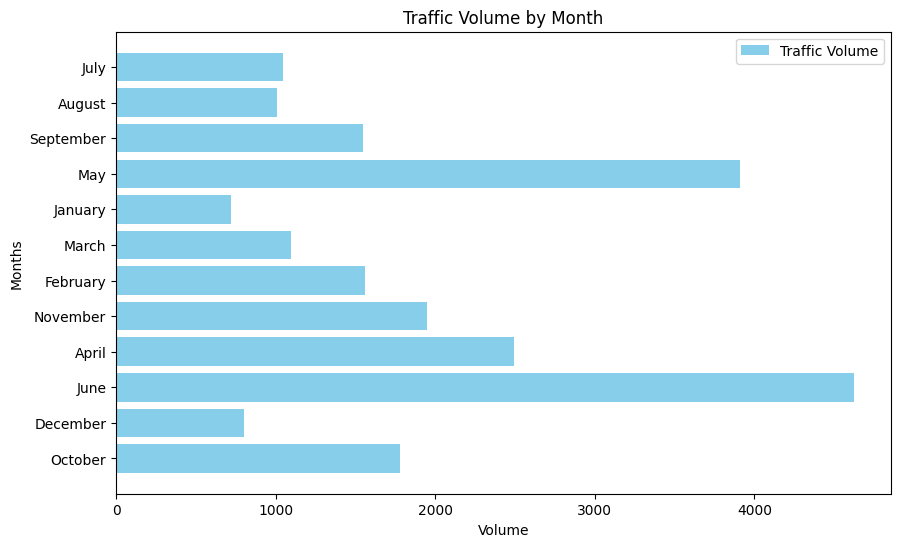

In [26]:
#horizontal bar plot 

#sample size of 100000 due to large dataset having (27188509, 15)
sampled_df = df.sample(n=100000, random_state=42)
plt.figure(figsize=(10, 6))
plt.barh(sampled_df['Months'], sampled_df['Vol'], color='skyblue', label="Traffic Volume")

#labels
plt.xlabel('Volume')
plt.ylabel('Months')
plt.title('Traffic Volume by Month')
#legend
plt.legend(loc='upper right')
plt.show()